<a href="https://colab.research.google.com/github/Jion-Oshima/ailia-models/blob/master/autocordinate1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install tensorflow
!pip install requests

In [26]:
# @title デフォルトのタイトル テキスト
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.image import imread
from PIL import Image
import matplotlib.image as mpimg
import time
import shutil
from natsort import natsorted
import math
from heapq import nlargest, nsmallest
import requests
import json

In [16]:
# フォルダを作る

# shutil.rmtree('image')
os.mkdir('image')

for num in range(30):
    if (num < 10):
        dir_name = 'image0' + str(num)
    else :
        dir_name = 'image' + str(num)
    os.mkdir('image/' + dir_name)

# shutil.rmtree('Original/.ipynb_checkpoints/')



FileExistsError: ignored

In [17]:
# トレーニングに使うフォルダ名の取得

path = 'image'
# path = "drive/MyDrive/txt_datasets"

folderfile = os.listdir(path)
folder = [f for f in folderfile if os.path.isdir(os.path.join(path, f))]
folder.sort()
print(folder)

['image00', 'image01', 'image02', 'image03', 'image04', 'image05', 'image06', 'image07', 'image08', 'image09', 'image10', 'image11', 'image12', 'image13', 'image14', 'image15', 'image16', 'image17', 'image18', 'image19', 'image20', 'image21', 'image22', 'image23', 'image24', 'image25', 'image26', 'image27', 'image28', 'image29']


In [18]:
# トレーニング

tr_num = len(folder) # トレーニングに使うフォルダの数

vgg_model = tf.keras.applications.vgg16.VGG16(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3)
)

img_name = ["image_0.jpg", "image_1.jpg", "image_2.jpg",
            "image_3.jpg", "image_4.jpg", "image_5.jpg"]
features = np.zeros((tr_num, 6, 7, 7, 512))
i = 0
for dir in folder:
    j = 0
    for img in img_name:
        path = "image/" + dir + "/" + img
        img_pil = tf.keras.preprocessing.image.load_img(
            path, target_size=(224, 224)
        )
        img = tf.keras.preprocessing.image.img_to_array(img_pil)
        img = img[tf.newaxis, ...]
        img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img)
        features[i][j] = vgg_model.predict(img_preprocessed)
        j += 1
    i += 1
# Flatten features
flattened_features = features.reshape((tr_num, 6, 7 * 7 * 512))
# Classification model
classification_model = models.Sequential([
    layers.Flatten(input_shape=(6, 7 * 7 * 512,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Assuming 5 classes for classification
])
# Compile the model
classification_model.compile(optimizer='adam',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

# ラベルを作る

labels = np.zeros((tr_num, 6))
j = 0
for dir in folder:
    f = open('image/' + dir + '/onehot.txt', 'r')
    label = f.read()
    newlist = label.split("[")
    uselist = newlist[1]
    uselist2 = uselist.split("]")
    uselist3 = uselist2[0]
    valuelist = uselist3.split(", ")
    returnlist = []
    for i in range(len(valuelist)):
        returnlist.append(int(valuelist[i]))
    returnlist.insert(0, 0)
    f.close()
    if j == 0:
        labels = returnlist
    else:
        labels = np.concatenate([labels, returnlist], 0)
    j += 1
labels = labels.reshape((tr_num, 6))

classification_model.fit(flattened_features, labels, epochs=10, batch_size=32, verbose=0)

1/1 [==============================] - 0s 445ms/step


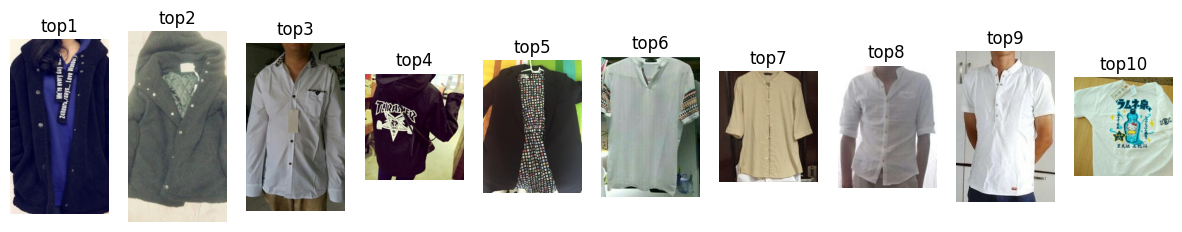

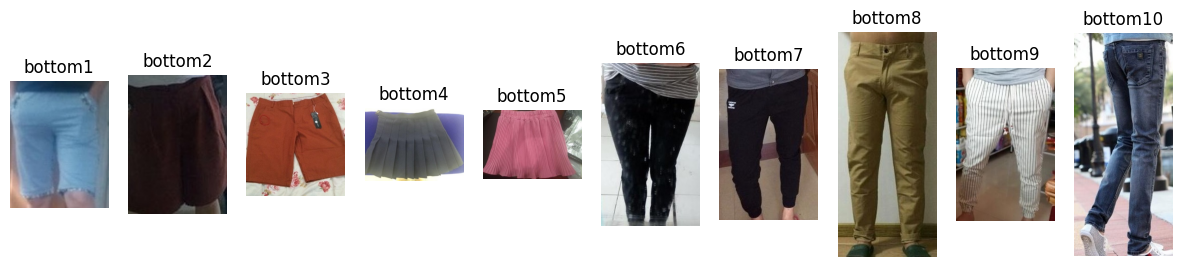

Choose today's top: 1
I will choose the best bottom from your clothes
1/1 [==============================] - 0s 39ms/step


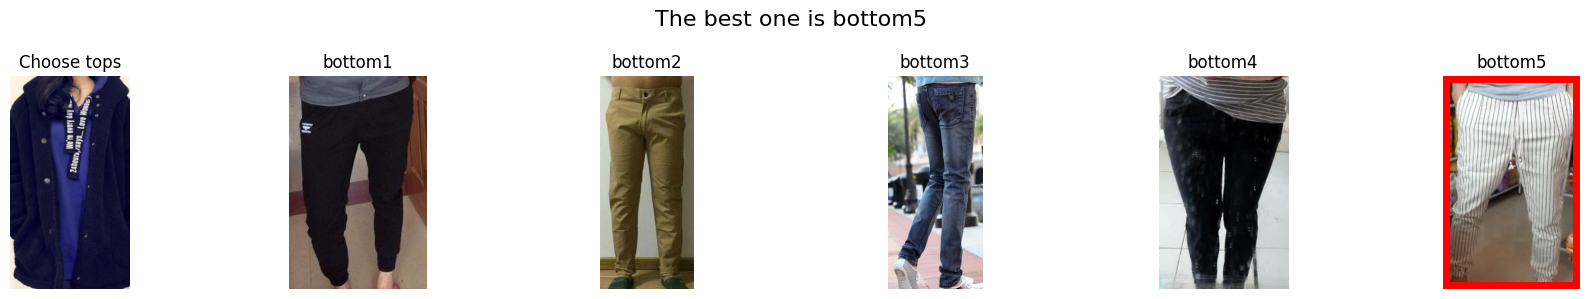

In [30]:
# 画像のファイルパス（適切なファイルパスに変更してください）
# 自分の持っているtopsが入っているフォルダ
tops = 'tops'
bottoms = "bottoms"
bottoms_path = os.listdir(bottoms)

tops_paths = os.listdir(tops)
bottoms_path.sort()
tops_paths.sort()
n = len(tops_paths)
m = len(bottoms_path)
for i in range(n):
    tops_paths[i] = tops + "/" + tops_paths[i]
for i in range(n):
    bottoms_path[i] = bottoms + "/" + bottoms_path[i]
# 画像の読み込みとリサイズ
images = [mpimg.imread(image_path) for image_path in tops_paths]
bimages = [mpimg.imread(image_path) for image_path in bottoms_path]
# 1行3列のグリッドを作成
fig, axes = plt.subplots(1, n, figsize=(15, 5))
fig, axes2 = plt.subplots(1, m, figsize=(15, 5))
# 画像を表示
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title("top" + str(i + 1))
    ax.axis("off")
for i, ax in enumerate(axes2):
    ax.imshow(bimages[i])
    ax.set_title("bottom" + str(i + 1))
    ax.axis("off")
# グリッドを表示
plt.show()
# 5秒待機
time.sleep(0.1)
# plt.show()を閉じる
plt.close()
# キーボード入力を受け取る
user_input = input("Choose today's top: ")
shutil.copyfile(tops_paths[int(user_input)-1], 'Original/image_0.jpg')
# ユーザー入力を表示
print('I will choose the best bottom from your clothes')

api_key = "59504b94d12d8f044ffa9326dcc2e971"


response = requests.get(
    "https://api.openweathermap.org/data/2.5/weather",
    params={

        ## 都市名で取得する場合
        "q": "AICHI",

        "appid": api_key,
        "units": "metric",
        "lang": "ja",
    },
)
ret = json.loads(response.text)
# pprint.pprint(ret)
# ルールベースでズボンの候補を決定

bottoms = "bottoms"
bottoms_list = os.listdir(bottoms)
# tempreture = int(input("today's tempreture is :"))
tempreture = ret['main']['temp']
temp = np.zeros(len(bottoms_list))
e = math.e
for i in range(len(bottoms_list)):
  if "SHtop" in bottoms_list[i] :
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "Ltop" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((25 - tempreture)/5)))
  elif "SHouter" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "Louter" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((25 - tempreture)/5)))
  elif "vest" in bottoms_list[i]:
    temp[i] = 1
  elif "sling" in bottoms_list[i]:
    temp[i] = 1
  elif "shorts" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "trousers" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((25 - tempreture)/5)))
  elif "skirt" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "SHdress" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "Ldress" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((25 - tempreture)/5)))
  elif "Vdress" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))
  elif "SLdress" in bottoms_list[i]:
    temp[i] = 0.5 + (1/(1+e**-((tempreture - 25)/5)))

#気温との適合値が高いものから順にコピー
for n in range(1,6):
  result = [(value,i)for i,value in enumerate(temp)]
  max_result = nlargest(n, result)
  bottom_path = "bottoms/" +  bottoms_list[int(max_result[n-1][1])]
  shutil.copyfile(bottom_path, 'Original/image_{}.jpg'.format(n))

# 選んだ服に対して、5つの候補の確率を求める

input_dir = "Original"

features = np.zeros((6, 7, 7, 512))
i = 0
for img in img_name:
    path = input_dir + "/" + img
    img_pil = tf.keras.preprocessing.image.load_img(
        path, target_size=(224, 224)
    )
    img = tf.keras.preprocessing.image.img_to_array(img_pil)
    img = img[tf.newaxis, ...]
    img_preprocessed = tf.keras.applications.vgg16.preprocess_input(img)
    features[i] = vgg_model.predict(img_preprocessed)
    i += 1
# Flatten features
flattened_features_test = features.reshape((1, 6, 7 * 7 * 512))

# Evaluate the model on the test data
predictions = classification_model.predict(flattened_features_test)
max_index = np.argmax(predictions)

# 画像のファイルパス（適切なファイルパスに変更してください）
# 選んだtopsと正解のズボンが入っているフォルダ
image_paths = os.listdir(input_dir)
image_paths.sort()
n = len(image_paths)
for i in range(n):
    image_paths[i] = input_dir + "/" + image_paths[i]

# タイトルの設定
image_titles = ["Choose tops", "bottom1", "bottom2", "bottom3", "bottom4", "bottom5"]
# 画像の読み込みとリサイズ
images = [imread(image_path) for image_path in image_paths]
# 1行6列のグリッドを作成
fig, axes = plt.subplots(1, 6, figsize=(18, 3))
# 赤い枠を表示する画像の位置
target_index = max_index  # 0-based index
# 画像を表示
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(image_titles[i])
    ax.axis("off")
    # 赤い枠を表示する画像に対しての処理
    if i == target_index:
        rect = Rectangle((0, 0), 1, 1, linewidth=10, edgecolor='red', facecolor='none', transform=ax.transAxes)
        ax.add_patch(rect)
fig.suptitle('The best one is bottom' + str(max_index), fontsize=16)
plt.tight_layout()
# 画像を保存
plt.savefig("Result/result.jpg")
plt.show()